In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
data = load_diabetes()
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
X,y = pd.DataFrame(data.data,columns=data.feature_names),data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [6]:
# Initialize empty lists to store coefficients and R² scores
coefs = []
r2_scores = []

# Loop over different regularization parameters (alpha values)
for i in [0, 0.1, 1, 10]:
    
    # Create a Lasso regression model with the current alpha value
    reg = Lasso(alpha=i)
    
    # Fit the model on the training data (X_train, y_train)
    reg.fit(X_train, y_train)
    
    # Append the model's coefficients to the coefs list
    coefs.append(reg.coef_.tolist())
    
    
    # Append the R² score for the current model to the r2_scores list
    r2_scores.append(r2_score(y_test, y_pred))


C:\Users\LEGION\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\LEGION\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\LEGION\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

IndexError: list index out of range

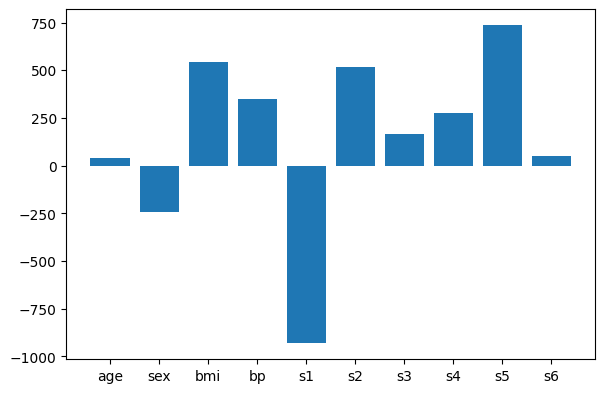

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# Plot for alpha = 0 (first subplot)
plt.subplot(221)  # 2x2 grid, first subplot
plt.bar(data.feature_names, coefs[0])  # Bar plot for coefficients with alpha = 0
plt.title(f'Alpha = 0(No Regularization) ,r2_score = {round(r2_scores[0],2)}')  # Add title with R² score for alpha = 0

# Plot for alpha = 0 (second subplot)
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title(f'Alpha = 0.1 ,r2_score = {round(r2_scores[1],2)}')

# Plot for alpha = 0 (third subplot)
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title(f'Alpha = 1 ,r2_score = {round(r2_scores[2],2)}')

# Plot for alpha = 0 (fourth subplot)
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title(f'Alpha = 10(Underfitting) ,r2_score = {round(r2_scores[3],2)}')

plt.show()

In [301]:

# Initialize empty lists to store coefficients and R² scores
coefs = []
r2_scores = []

# Loop over different regularization parameters (alpha values)
for i in [0.0001,0.0005,0.009,0.015,0.1,0.5,1,1.7,3.6,5]:
    
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_.tolist())
    


In [302]:
df_coefficent = pd.DataFrame(coefs,columns=data.feature_names)

In [303]:
df_coefficent['alpha']= [0.0001,0.0005,0.009,0.015,0.1,0.5,1,1.7,3.6,5]

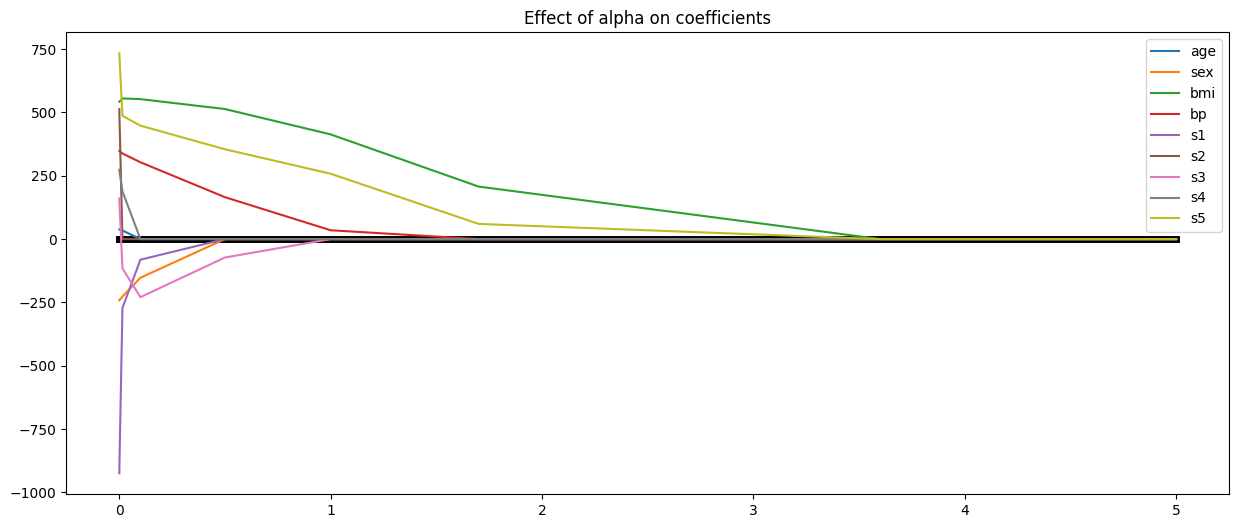

In [304]:

plt.figure(figsize=(15,6))
plt.plot(df_coefficent['alpha'],np.zeros(len(df_coefficent['alpha'])),color='black',linewidth=5)
for i in range(9):
    plt.plot(df_coefficent['alpha'],df_coefficent.iloc[:,i],label=data.feature_names[i])
plt.legend()
plt.title("Effect of alpha on coefficients")
plt.show()